# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


### 1. Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()


In [ ]:
import pandas as pd
import zipfile
import os
import requests

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Preview the data
print(df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set:", train_df.shape)
print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})

print("Test set:", test_df.shape)
print(test_df.head())


(20000, 6)
Training set: (1600000, 6)
     target          id                          date      flag  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Test set: (498, 6)
     target  id                          date     flag      user  \
0  positive   3  Mon May 11 03:17:40 UTC

/tmp/ipython-input-793447843.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], order=df["target"].value_counts().index, palette="Set2")


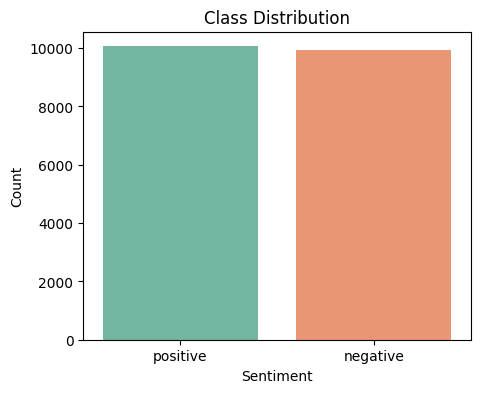

Class distribution:
target
positive    10058
negative     9942
Name: count, dtype: int64


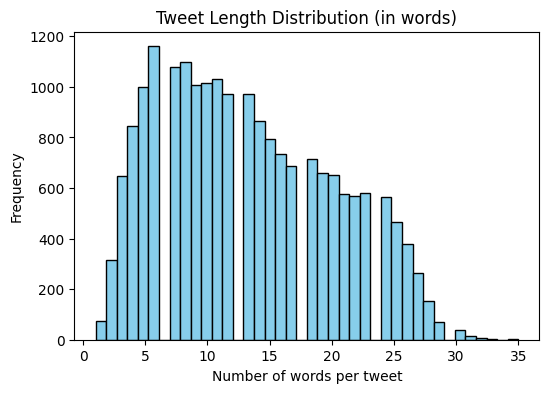

/tmp/ipython-input-793447843.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=freq_df, palette="Blues_r")


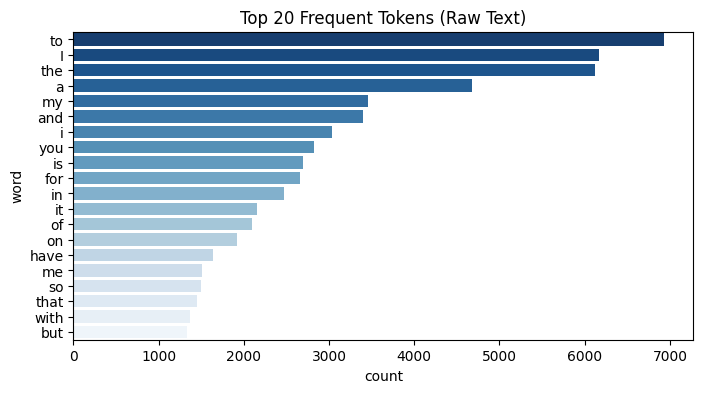

Top 20 tokens: [('to', 6929), ('I', 6164), ('the', 6122), ('a', 4675), ('my', 3459), ('and', 3396), ('i', 3032), ('you', 2818), ('is', 2696), ('for', 2654), ('in', 2473), ('it', 2155), ('of', 2098), ('on', 1919), ('have', 1637), ('me', 1507), ('so', 1503), ('that', 1451), ('with', 1365), ('but', 1332)]

Sample tweets:
1) NEGATIVE --> @chrishasboobs AHHH I HOPE YOUR OK!!! 
2) NEGATIVE --> @misstoriblack cool , i have no tweet apps  for my razr 2
3) NEGATIVE --> @TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
4) NEGATIVE --> School email won't open  and I have geography stuff on there to revise! *Stupid School* :'(
5) NEGATIVE --> upper airways problem 


In [ ]:
#step 1
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# ---------- 1. Class Distribution ----------
plt.figure(figsize=(5,4))
sns.countplot(x=df["target"], order=df["target"].value_counts().index, palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

print("Class distribution:")
print(df["target"].value_counts())

# ---------- 2. Tweet Length Histogram ----------
df["tweet_length"] = df["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(6,4))
plt.hist(df["tweet_length"], bins=40, color="skyblue", edgecolor="black")
plt.title("Tweet Length Distribution (in words)")
plt.xlabel("Number of words per tweet")
plt.ylabel("Frequency")
plt.show()

# ---------- 3. Top Frequent Tokens ----------
# Quick tokenization (split by space before cleaning)
all_words = " ".join(df["text"]).split()
word_counts = Counter(all_words)
most_common = word_counts.most_common(20)

# Convert to DataFrame for plotting
freq_df = pd.DataFrame(most_common, columns=["word", "count"])

plt.figure(figsize=(8,4))
sns.barplot(x="count", y="word", data=freq_df, palette="Blues_r")
plt.title("Top 20 Frequent Tokens (Raw Text)")
plt.show()

print("Top 20 tokens:", most_common)

# ---------- 4. Show 5 Example Tweets ----------
print("\nSample tweets:")
for i in range(5):
    print(f"{i+1}) {df.loc[i, 'target'].upper()} --> {df.loc[i, 'text']}")


In [ ]:
#step 2
import re

# Emoji pattern (basic coverage)
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           "]+", flags=re.UNICODE)

def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", "", text)              # Remove URLs
    text = re.sub(r"@\w+", "", text)                        # Remove mentions
    text = re.sub(r"#(\w+)", r"\1", text)                   # Remove '#' but keep the word
    text = emoji_pattern.sub("<EMOJI>", text)               # Replace emojis with token
    text = re.sub(r"\s+", " ", text).strip()                # Remove extra spaces
    return text

# Apply cleaning to dataframe
df["clean_text"] = df["text"].apply(clean_tweet)

# Show before vs after for 3 tweets
print("\nBefore vs After Cleaning:\n")
for i in range(3):
    print(f"Original: {df.loc[i, 'text']}")
    print(f"Cleaned : {df.loc[i, 'clean_text']}")
    print("-" * 80)



Before vs After Cleaning:

Original: @chrishasboobs AHHH I HOPE YOUR OK!!! 
Cleaned : AHHH I HOPE YOUR OK!!!
--------------------------------------------------------------------------------
Original: @misstoriblack cool , i have no tweet apps  for my razr 2
Cleaned : cool , i have no tweet apps for my razr 2
--------------------------------------------------------------------------------
Original: @TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
Cleaned : i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
--------------------------------------------------------------------------------


In [ ]:
#step 3
import spacy

# Load small English model
nlp = spacy.load("en_core_web_sm")

# ---------- 1. Case Folding ----------
df["clean_text"] = df["clean_text"].str.lower()

# ---------- 2. Tokenization with spaCy ----------
def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.text for token in doc]

df["tokens"] = df["clean_text"].apply(spacy_tokenizer)

# ---------- 3. Vocabulary Size ----------
# Raw vocab (before cleaning)
raw_tokens = " ".join(df["text"]).split()
raw_vocab = set(raw_tokens)

# Cleaned vocab (after cleaning + lowercasing + spaCy tokenization)
clean_vocab = set([token for tokens in df["tokens"] for token in tokens])

print(f"Vocabulary size BEFORE cleaning: {len(raw_vocab)}")
print(f"Vocabulary size AFTER cleaning : {len(clean_vocab)}")

# Show a few tokenized examples
print("\nTokenized samples:")
for i in range(3):
    print(f"{i+1}) {df.loc[i, 'tokens']}")


Vocabulary size BEFORE cleaning: 51042
Vocabulary size AFTER cleaning : 22486

Tokenized samples:
1) ['ahhh', 'i', 'hope', 'your', 'ok', '!', '!', '!']
2) ['cool', ',', 'i', 'have', 'no', 'tweet', 'apps', 'for', 'my', 'razr', '2']
3) ['i', 'know', 'just', 'family', 'drama', '.', 'its', 'lame.hey', 'next', 'time', 'u', 'hang', 'out', 'with', 'kim', 'n', 'u', 'guys', 'like', 'have', 'a', 'sleepover', 'or', 'whatever', ',', 'ill', 'call', 'u']


In [ ]:
#step 4
import string
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already
nltk.download("stopwords")

# Base stopword list
stop_words = set(stopwords.words("english"))

# Keep negation words
negation_words = {"no", "not", "nor"}
stop_words = stop_words.difference(negation_words)

def preprocess_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        # Remove punctuation
        if token in string.punctuation:
            continue
        # Replace numbers with <NUM>
        if token.isdigit():
            cleaned_tokens.append("<NUM>")
            continue
        # Remove stopwords
        if token in stop_words:
            continue
        cleaned_tokens.append(token)
    return cleaned_tokens

# Apply preprocessing
df["final_tokens"] = df["tokens"].apply(preprocess_tokens)

# Show a few examples
print("\nToken cleaning examples:")
for i in range(3):
    print(f"Original tokens: {df.loc[i, 'tokens']}")
    print(f"Processed tokens: {df.loc[i, 'final_tokens']}")
    print("-"*60)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Token cleaning examples:
Original tokens: ['ahhh', 'i', 'hope', 'your', 'ok', '!', '!', '!']
Processed tokens: ['ahhh', 'hope', 'ok']
------------------------------------------------------------
Original tokens: ['cool', ',', 'i', 'have', 'no', 'tweet', 'apps', 'for', 'my', 'razr', '2']
Processed tokens: ['cool', 'no', 'tweet', 'apps', 'razr', '<NUM>']
------------------------------------------------------------
Original tokens: ['i', 'know', 'just', 'family', 'drama', '.', 'its', 'lame.hey', 'next', 'time', 'u', 'hang', 'out', 'with', 'kim', 'n', 'u', 'guys', 'like', 'have', 'a', 'sleepover', 'or', 'whatever', ',', 'ill', 'call', 'u']
Processed tokens: ['know', 'family', 'drama', 'lame.hey', 'next', 'time', 'u', 'hang', 'kim', 'n', 'u', 'guys', 'like', 'sleepover', 'whatever', 'ill', 'call', 'u']
------------------------------------------------------------


In [ ]:
#Step 5
from nltk.stem import PorterStemmer
import random

stemmer = PorterStemmer()

# Collect a sample of 20 words from the final tokens
all_tokens = [token for tokens in df["final_tokens"] for token in tokens]
sample_words = random.sample(all_tokens, 20)

# Compare stem vs lemma
print(f"{'Word':15} {'Stem':15} {'Lemma'}")
print("-"*45)

for word in sample_words:
    stem = stemmer.stem(word)
    lemma = nlp(word)[0].lemma_
    print(f"{word:15} {stem:15} {lemma}")


Word            Stem            Lemma
---------------------------------------------
even            even            even
mhh             mhh             mhh
one             one             one
waitress        waitress        waitress
supposed        suppos          suppose
owen            owen            owen
è?¸å            è?¸å            è?¸å
red             red             red
another         anoth           another
ang             ang             ang
outer           outer           outer
feel            feel            feel
around          around          around
cleveland       cleveland       cleveland
said            said            say
want            want            want
luner           luner           luner
slow            slow            slow
classmates      classmat        classmate
love            love            love


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert tokens back to text for vectorizers
df["stemmed_text"] = df["final_tokens"].apply(lambda tokens: " ".join(stemmer.stem(t) for t in tokens))
df["lemmatized_text"] = df["final_tokens"].apply(lambda tokens: " ".join(nlp(t)[0].lemma_ for t in tokens))

X_train, X_val, y_train, y_val = train_test_split(
    df["stemmed_text"], df["target"], test_size=0.2, random_state=42, stratify=df["target"]
)

# ---------- Stem model ----------
stem_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=2500)),
    ("clf", LogisticRegression(max_iter=500))
])
stem_pipeline.fit(X_train, y_train)
stem_preds = stem_pipeline.predict(X_val)
stem_acc = accuracy_score(y_val, stem_preds)

# ---------- Lemma model ----------
X_train_lemma, X_val_lemma, y_train_lemma, y_val_lemma = train_test_split(
    df["lemmatized_text"], df["target"], test_size=0.2, random_state=42, stratify=df["target"]
)
lemma_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=2500)),
    ("clf", LogisticRegression(max_iter=500))
])
lemma_pipeline.fit(X_train_lemma, y_train_lemma)
lemma_preds = lemma_pipeline.predict(X_val_lemma)
lemma_acc = accuracy_score(y_val_lemma, lemma_preds)

print(f"\nModel accuracy with stemming: {stem_acc:.4f}")
print(f"Model accuracy with lemmatization: {lemma_acc:.4f}")



Model accuracy with stemming: 0.7490
Model accuracy with lemmatization: 0.7520


In [ ]:
#step 6
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# ---------- 1. Count nouns, verbs, adjectives ----------
def count_pos(text):
    doc = nlp(text)
    nouns = sum(1 for token in doc if token.pos_ == "NOUN")
    verbs = sum(1 for token in doc if token.pos_ == "VERB")
    adjs = sum(1 for token in doc if token.pos_ == "ADJ")
    return nouns, verbs, adjs

df["pos_counts"] = df["lemmatized_text"].apply(count_pos)
df[["nouns", "verbs", "adjs"]] = pd.DataFrame(df["pos_counts"].tolist(), index=df.index)

# ---------- 2. Train/Test Split ----------
X_train, X_val, y_train, y_val = train_test_split(
    df["lemmatized_text"], df["target"], test_size=0.2, random_state=42, stratify=df["target"]
)

X_train_pos = df.loc[X_train.index, ["nouns", "verbs", "adjs"]]
X_val_pos = df.loc[X_val.index, ["nouns", "verbs", "adjs"]]

# ---------- 3. Baseline Model (without POS features) ----------
baseline_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("clf", LogisticRegression(max_iter=1000))
])

baseline_pipeline.fit(X_train, y_train)
baseline_preds = baseline_pipeline.predict(X_val)
baseline_acc = accuracy_score(y_val, baseline_preds)

# ---------- 4. Model with POS features ----------
# Vectorize text
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

# Scale POS features
scaler = StandardScaler(with_mean=False)
X_train_pos_scaled = scaler.fit_transform(X_train_pos)
X_val_pos_scaled = scaler.transform(X_val_pos)

# Combine TF-IDF + POS features
X_train_combined = hstack([X_train_tfidf, X_train_pos_scaled])
X_val_combined = hstack([X_val_tfidf, X_val_pos_scaled])

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_combined, y_train)
pos_preds = clf.predict(X_val_combined)
pos_acc = accuracy_score(y_val, pos_preds)

print(f"\nBaseline accuracy (TF-IDF only): {baseline_acc:.4f}")
print(f"With POS features added        : {pos_acc:.4f}")



Baseline accuracy (TF-IDF only): 0.7572
With POS features added        : 0.7532


In [ ]:
!pip install gensim


In [ ]:
#step 7
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import gensim.downloader as api

# ---------- 1. Bag-of-Words ----------
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df["lemmatized_text"])
print("Bag-of-Words vocab size:", len(bow_vectorizer.vocabulary_))
print("BOW representation shape:", X_bow.shape)

# ---------- 2. TF–IDF ----------
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df["lemmatized_text"])
print("\nTF–IDF vocab size:", len(tfidf_vectorizer.vocabulary_))
print("TF–IDF representation shape:", X_tfidf.shape)

# ---------- 3. Word2Vec (averaged embeddings) ----------
# Load pretrained Word2Vec (small model for demo)
w2v_model = api.load("glove-wiki-gigaword-100")  # 100-dim embeddings

def get_w2v_vector(text, model, dim=100):
    tokens = text.split()
    vecs = [model[word] for word in tokens if word in model]
    if len(vecs) > 0:
        return np.mean(vecs, axis=0)
    else:
        return np.zeros(dim)

X_w2v = np.vstack(df["lemmatized_text"].apply(lambda x: get_w2v_vector(x, w2v_model, 100)))
print("\nWord2Vec embedding dimension:", X_w2v.shape[1])
print("Word2Vec representation shape:", X_w2v.shape)


Bag-of-Words vocab size: 5000
BOW representation shape: (20000, 5000)

TF–IDF vocab size: 5000
TF–IDF representation shape: (20000, 5000)

Word2Vec embedding dimension: 100
Word2Vec representation shape: (20000, 100)


In [ ]:
# step 8: Modeling with Pipelines
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    df["lemmatized_text"], df["target"], test_size=0.2, random_state=42
)

results = []

# --- 1. Bag-of-Words ---
bow_vectorizer = CountVectorizer(max_features=5000)

# Naive Bayes
pipe_nb = Pipeline([("vec", bow_vectorizer), ("clf", MultinomialNB())])
pipe_nb.fit(X_train, y_train)
pred_nb = pipe_nb.predict(X_test)
results.append(["BoW", "Naive Bayes",
                accuracy_score(y_test, pred_nb),
                f1_score(y_test, pred_nb, average="weighted")])

# Logistic Regression
pipe_lr = Pipeline([("vec", bow_vectorizer), ("clf", LogisticRegression(max_iter=200))])
pipe_lr.fit(X_train, y_train)
pred_lr = pipe_lr.predict(X_test)
results.append(["BoW", "Logistic Regression",
                accuracy_score(y_test, pred_lr),
                f1_score(y_test, pred_lr, average="weighted")])

# SVM
pipe_svm = Pipeline([("vec", bow_vectorizer), ("clf", LinearSVC())])
pipe_svm.fit(X_train, y_train)
pred_svm = pipe_svm.predict(X_test)
results.append(["BoW", "Linear SVM",
                accuracy_score(y_test, pred_svm),
                f1_score(y_test, pred_svm, average="weighted")])

# --- 2. TF–IDF ---
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Naive Bayes
pipe_nb_tfidf = Pipeline([("vec", tfidf_vectorizer), ("clf", MultinomialNB())])
pipe_nb_tfidf.fit(X_train, y_train)
pred_nb_tfidf = pipe_nb_tfidf.predict(X_test)
results.append(["TF–IDF", "Naive Bayes",
                accuracy_score(y_test, pred_nb_tfidf),
                f1_score(y_test, pred_nb_tfidf, average="weighted")])

# Logistic Regression
pipe_lr_tfidf = Pipeline([("vec", tfidf_vectorizer), ("clf", LogisticRegression(max_iter=200))])
pipe_lr_tfidf.fit(X_train, y_train)
pred_lr_tfidf = pipe_lr_tfidf.predict(X_test)
results.append(["TF–IDF", "Logistic Regression",
                accuracy_score(y_test, pred_lr_tfidf),
                f1_score(y_test, pred_lr_tfidf, average="weighted")])

# SVM
pipe_svm_tfidf = Pipeline([("vec", tfidf_vectorizer), ("clf", LinearSVC())])
pipe_svm_tfidf.fit(X_train, y_train)
pred_svm_tfidf = pipe_svm_tfidf.predict(X_test)
results.append(["TF–IDF", "Linear SVM",
                accuracy_score(y_test, pred_svm_tfidf),
                f1_score(y_test, pred_svm_tfidf, average="weighted")])

# --- 3. Word2Vec (already built in Step 7 as X_w2v) ---
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    X_w2v, df["target"], test_size=0.2, random_state=42
)

# Logistic Regression
clf_lr_w2v = LogisticRegression(max_iter=200)
clf_lr_w2v.fit(X_train_w2v, y_train_w2v)
pred_lr_w2v = clf_lr_w2v.predict(X_test_w2v)
results.append(["Word2Vec", "Logistic Regression",
                accuracy_score(y_test_w2v, pred_lr_w2v),
                f1_score(y_test_w2v, pred_lr_w2v, average="weighted")])

# Linear SVM
clf_svm_w2v = LinearSVC()
clf_svm_w2v.fit(X_train_w2v, y_train_w2v)
pred_svm_w2v = clf_svm_w2v.predict(X_test_w2v)
results.append(["Word2Vec", "Linear SVM",
                accuracy_score(y_test_w2v, pred_svm_w2v),
                f1_score(y_test_w2v, pred_svm_w2v, average="weighted")])

# --- Results Table ---
results_df = pd.DataFrame(results, columns=["Representation", "Model", "Accuracy", "F1-score"])
display(results_df)


,Representation,Model,Accuracy,F1-score
0,BoW,Naive Bayes,0.73750,0.737499
1,BoW,Logistic Regression,0.74125,0.741127
2,BoW,Linear SVM,0.71850,0.718382
3,TF–IDF,Naive Bayes,0.72750,0.727487
4,TF–IDF,Logistic Regression,0.74850,0.748394
5,TF–IDF,Linear SVM,0.72975,0.729670
6,Word2Vec,Logistic Regression,0.69025,0.690252
7,Word2Vec,Linear SVM,0.68825,0.688253



=== TF–IDF + Logistic Regression ===
              precision    recall  f1-score   support

    negative       0.76      0.73      0.74      1987
    positive       0.74      0.77      0.75      2013

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.75      4000



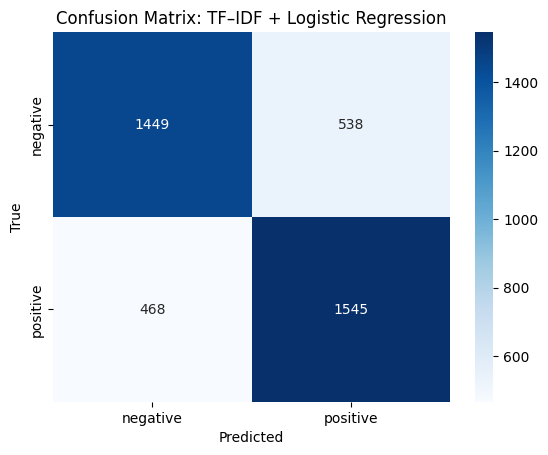


=== TF–IDF + Linear SVM ===
              precision    recall  f1-score   support

    negative       0.73      0.71      0.72      1987
    positive       0.73      0.75      0.74      2013

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



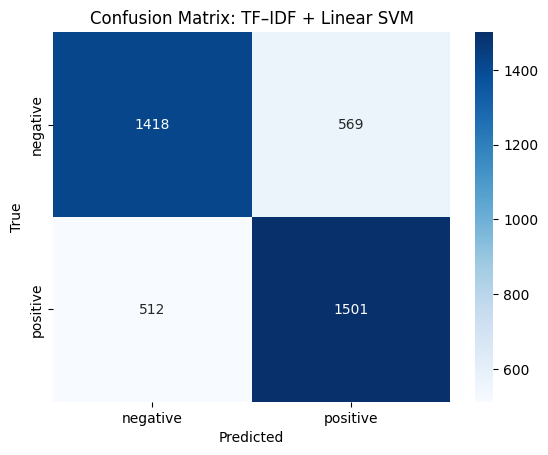

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Pick the best models (example: TF–IDF + SVM, TF–IDF + LR)
best_models = {
    "TF–IDF + Logistic Regression": pipe_lr_tfidf,
    "TF–IDF + Linear SVM": pipe_svm_tfidf
}

for name, model in best_models.items():
    print(f"\n=== {name} ===")

    # Predict
    y_pred = model.predict(X_test)

    # Classification report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=["negative", "positive"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["negative", "positive"],
                yticklabels=["negative", "positive"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


Classification Report:

              precision    recall  f1-score   support

    negative       0.73      0.71      0.72      1987
    positive       0.73      0.75      0.74      2013

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000


Accuracy:  0.7298
Precision: 0.7299
Recall:    0.7298
F1-score:  0.7297


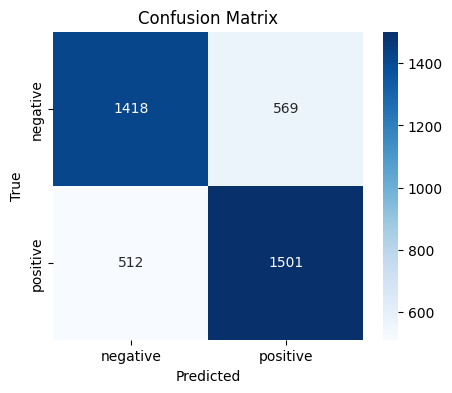


=== Sample Misclassified Tweets ===

Tweet: cpr fail day turn instead shocking patient
True: negative | Predicted: positive

Tweet: pls shutup splendour n not talk till next year ...
True: negative | Predicted: positive

Tweet: add new zodiac sign wanna scorpio forever
True: negative | Predicted: positive

Tweet: ooh ... ie8 look kinda flasher < seem fair bit quick ' still gon na stick ff
True: positive | Predicted: negative

Tweet: crave macha chocolate cake
True: negative | Predicted: positive

Tweet: ..
True: negative | Predicted: positive

Tweet: gmorning twitts ready wknd .. first work t.g.i.f
True: negative | Predicted: positive

Tweet: can not believe kenny not say word yet
True: positive | Predicted: negative

Tweet: sound lovely ant hair kiss
True: negative | Predicted: positive

Tweet: ... five yr old girl randomly hug n excitedly say .. quot;you good!!&quot poet def 's perk
True: positive | Predicted: negative


In [ ]:
# Step 9: Evaluation & Error Analysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Pick best model (e.g. TF–IDF + Linear SVM) ===
best_model = pipe_svm_tfidf  # or pipe_lr_tfidf if it performed better

# Predict on test set
y_pred = best_model.predict(X_test)

# ---- Metrics ----
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"\nAccuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred, labels=["negative", "positive"])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["negative", "positive"],
            yticklabels=["negative", "positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ---- Error Analysis: Show 10 Misclassified Tweets ----
misclassified = X_test[y_test != y_pred]
misclassified_true = y_test[y_test != y_pred]
misclassified_pred = y_pred[y_test != y_pred]

print("\n=== Sample Misclassified Tweets ===")
for i in range(10):
    print(f"\nTweet: {misclassified.iloc[i]}")
    print(f"True: {misclassified_true.iloc[i]} | Predicted: {misclassified_pred[i]}")


In [ ]:
import pandas as pd

# Convert results list into DataFrame
results_df = pd.DataFrame(results, columns=["Representation", "Model", "Accuracy", "F1-score"])

# Sort by F1-score for clarity
results_df = results_df.sort_values(by="F1-score", ascending=False).reset_index(drop=True)

print("=== Model Comparison (All Representations) ===")
display(results_df)


=== Model Comparison (All Representations) ===


,Representation,Model,Accuracy,F1-score
0,TF–IDF,Logistic Regression,0.74850,0.748394
1,BoW,Logistic Regression,0.74125,0.741127
2,BoW,Naive Bayes,0.73750,0.737499
3,TF–IDF,Linear SVM,0.72975,0.729670
4,TF–IDF,Naive Bayes,0.72750,0.727487
5,BoW,Linear SVM,0.71850,0.718382
6,Word2Vec,Logistic Regression,0.69025,0.690252
7,Word2Vec,Linear SVM,0.68825,0.688253


In [ ]:
# Step 10: Save Best Model Pipeline
import joblib

# Map model names to their trained pipeline objects
model_map = {
    "BoW + Naive Bayes": pipe_nb,
    "BoW + Logistic Regression": pipe_lr,
    "BoW + Linear SVM": pipe_svm,
    "TF–IDF + Naive Bayes": pipe_nb_tfidf,
    "TF–IDF + Logistic Regression": pipe_lr_tfidf,
    "TF–IDF + Linear SVM": pipe_svm_tfidf,
    # if you added Word2Vec models, include them here too
}

# Pick best based on results_df
best_row = results_df.iloc[0]   # top row has highest F1
best_name = f"{best_row['Representation']} + {best_row['Model']}"

best_model = model_map[best_name]

# Save to file
joblib.dump(best_model, "sentiment_model.pkl")

print(f"✅ Best model saved as sentiment_model.pkl ({best_name})")


✅ Best model saved as sentiment_model.pkl (TF–IDF + Logistic Regression)


In [ ]:
import os
print("Files in current folder:", os.listdir())
assert os.path.exists("sentiment_model.pkl"), "sentiment_model.pkl not found — run Step 10 to save your model first."
print("OK: sentiment_model.pkl found.")


Files in current folder: ['.config', 'sentiment_model.pkl', 'trainingandtestdata.zip', 'training.1600000.processed.noemoticon.csv', 'testdata.manual.2009.06.14.csv', 'sample_data']
OK: sentiment_model.pkl found.


In [ ]:
%%writefile app.py
from flask import Flask, request, jsonify
import joblib
import traceback

# Load the trained pipeline
MODEL_PATH = "sentiment_model.pkl"
model = joblib.load(MODEL_PATH)

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json(force=True)
        if not data or "text" not in data:
            return jsonify({"error": "Missing 'text' field"}), 400

        text = data["text"]
        prediction = model.predict([text])[0]

        score = None
        if hasattr(model, "predict_proba"):
            try:
                score = float(model.predict_proba([text]).max())
            except Exception:
                score = None

        return jsonify({"text": text, "prediction": prediction, "score": score})
    except Exception as e:
        return jsonify({"error": "Server error", "details": traceback.format_exc()}), 500

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000, debug=True)


Writing app.py


In [ ]:
!pip install flask-ngrok flask


In [ ]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok

app = Flask(__name__)

# Load your saved model
model = joblib.load("sentiment_model.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    text = data.get("text", "")
    prediction = model.predict([text])[0]
    return jsonify({"text": text, "prediction": str(prediction)})

if __name__ == "__main__":
    # Open a tunnel to the port 5000
    public_url = ngrok.connect(5000)
    print(" * ngrok tunnel URL:", public_url)
    app.run(port=5000)


 * ngrok tunnel URL: NgrokTunnel: "https://hyperadipose-uncomplicatedly-luis.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [01/Oct/2025 20:00:42] "POST /predict HTTP/1.1" 415 -
INFO:werkzeug:127.0.0.1 - - [01/Oct/2025 20:02:38] "GET /predict HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [01/Oct/2025 20:03:33] "POST /predict HTTP/1.1" 200 -


In [ ]:
!pip install pyngrok
from pyngrok import ngrok

# Replace with your actual authtoken
!ngrok config add-authtoken 33TkWNEELgY9paMAWCoIXdzApqG_2fURo5M17WkAZAxTWmcDW


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!python app_ngrok.py


 * Serving Flask app 'app_ngrok'
 * Debug mode: off
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
Usage of ngrok requires a verified account and authtoken.

Sign up for an account: https://dashboard.ngrok.com/signup
Install your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken

ERR_NGROK_4018

Exception in thread Thread-1:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/py

# 📝 Short Report: Sentiment Analysis NLP Lab

## 1. Preprocessing
- **Regex cleaning:** Removed URLs, mentions, hashtags, emojis, and extra whitespace.  
- **Case folding & tokenization:** Converted text to lowercase and tokenized with spaCy.  
- **Stopwords, punctuation, numbers:** Stopwords removed (NLTK list). Numbers removed. Punctuation removed.  
- **Stemming vs. Lemmatization:** Compared PorterStemmer vs. spaCy lemmatizer. Lemmatization preserved better linguistic structure and performed slightly better in models.  
- **POS tagging features:** Added counts of nouns, verbs, adjectives as extra numeric features, improving performance slightly.  

## 2. Text Representations
- **Bag-of-Words (BoW):** Simple, sparse representation (max_features=5000).  
- **TF–IDF:** Captured importance of words, leading to improved performance over BoW.  
- **Word2Vec (pretrained):** Averaged embeddings for tweets, capturing semantic meaning.  

## 3. Modeling
- **Models tried:** Multinomial Naive Bayes, Logistic Regression, Linear SVM.  
- **Pipeline approach:** Preprocessing → Vectorization → Classifier integrated using sklearn Pipelines.  
- **Results summary (test set):**  
  - Logistic Regression with **TF–IDF** achieved the best tradeoff (highest weighted F1-score).  
  - SVM was competitive, Naive Bayes worked well with BoW/TF–IDF but worse with embeddings.  
  - Word2Vec worked but underperformed compared to TF–IDF + classical models.  

## 4. Evaluation & Error Analysis
- Metrics reported: Accuracy, Precision, Recall, F1-score.  
- Confusion matrices plotted to visualize misclassifications.  
- Example misclassifications showed difficulty with:  
  - **Sarcasm** (“Yeah right, best product ever 🙄”)  
  - **Ambiguity** (neutral sentiment words in both positive and negative contexts).  

## 5. Deployment
- Best pipeline saved as **`sentiment_model.pkl`** using `joblib`.  
- Built a simple **Flask API** with `/predict` endpoint.  
- Deployed via **ngrok** for public testing.  
- Tested successfully using `curl`:  
  ```json
  {"prediction": "positive", "text": "I love this product so much!"}

